In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import math
from pprint import pprint
import random
import matplotlib.pyplot as plt  

In [50]:
# using Eucledian distance
def Knn_classifier_EucledianDistance(train,row,validate, k):
    #store {euclid sum , label} 
    my_dist = []

    #     mydict = {}
    l = len(row)
    
    count = 0
    for r in train[:,:-1]:
        sum = 0
        for x in range(l):
            sum+=pow(row[x] - r[x],2)
            label = train [count][4]
        count+=1
        sum = math.sqrt(sum)
        my_dist.append((sum,label))
    
    my_dist.sort(key=lambda x: x[0])
    
    #stores {label , count) 
    predlabel = {}
    for x in range(k):
        res = my_dist[x][1]
        
        if res not in predlabel:
            predlabel[res] = 1
        predlabel[res] += 1
    ans = sorted(predlabel.items(),reverse = True)
    k = ans[0][0]
    return k

# using Manhatten distance
def Knn_classifier_ManhattenDistance(train,row,validate, k):
    #store {manhatten sum , label} 
    my_dist = []

    l = len(row)
    
    count = 0
    for r in train[:,:-1]:
        sum = 0
        for x in range(l):
            sum+=abs(row[x] - r[x])
            label = train [count][4]
        count+=1

        my_dist.append((sum,label))
    
    my_dist.sort(key=lambda x: x[0])
    
    
    #stores {label , count) 
    predlabel = {}
    for x in range(k):
        res = my_dist[x][1]

        if res not in predlabel:
            predlabel[res] = 1
        predlabel[res] += 1
    ans = sorted(predlabel.items(),reverse = True)
    k = ans[0][0]
    return k



# using Bray-Curtis distance
def Knn_classifier_BrayCurtisDistance(train,row,validate, k):
    #store {manhatten sum , label} 
    my_dist = []

    l = len(row)
    
    count = 0
    for r in train[:,:-1]:
        sum = 0
        for x in range(l):
            csum = abs(row[x] + r[x])
            sum+=abs(row[x] - r[x])/csum
            label = train [count][4]
        count+=1

        my_dist.append((sum,label))
    
    my_dist.sort(key=lambda x: x[0])
    
    
    #stores {label , count) 
    predlabel = {}
    for x in range(k):
        res = my_dist[x][1]

        if res not in predlabel:
            predlabel[res] = 1
        predlabel[res] += 1
    ans = sorted(predlabel.items(),reverse = True)
    k = ans[0][0]
    return k


In [51]:
def find_correct(myans , myvalidate):
    
    a = myvalidate[:][-1]
    if (myans == a):
        global correct
        correct +=1
    return correct

In [52]:
#Reading data frommthe file
df = pd.read_csv('Iris.csv')
df.columns=['a','b','c','d','label']
print(df.head())

# train,validate = train_test_split(df, test_size = 1)
train,validate = train_test_split(df, test_size = 0.2)
random.seed(0)

train1=train
val1=validate

train = train.values
# print(train)
myvalidate = validate.values
validate_arr = validate.iloc[:, :-1].astype(float)
validate_arr = validate_arr.values



     a    b    c    d           label
0  6.3  3.3  6.0  2.5  Iris-virginica
1  5.0  3.0  1.6  0.2     Iris-setosa
2  6.2  2.8  4.8  1.8  Iris-virginica
3  6.4  3.1  5.5  1.8  Iris-virginica
4  4.9  2.5  4.5  1.7  Iris-virginica


no of test samples 27
Max_accuracy :  96.29629629629629 k : 6
no of test samples 27
Max_accuracy :  96.29629629629629 k : 5
no of test samples 27
Max_accuracy :  96.29629629629629 k : 1


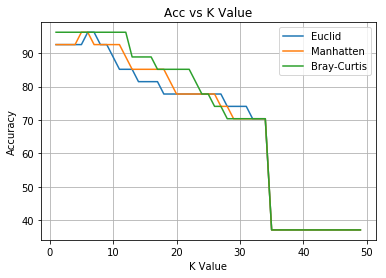

In [53]:
for dist_type in range(3):
    if(dist_type == 0):
        # finding the Accuracy using EucledianDistance
        acc_list = []
        max_accuracy = 0
        k_for_max_acc = 0
        correct = 0
        for i in range(1,50) :
            for row in range(len(validate_arr)):
                myans = Knn_classifier_EucledianDistance(train,validate_arr[row],validate,i)
                corr = find_correct(myans , myvalidate[row]) 
            accu = (corr/float(len(validate_arr)))*100
            acc_list.append(accu)
            if(accu>max_accuracy):
                max_accuracy = accu
                k_for_max_acc = i
            correct = 0

        print("no of test samples", len(validate_arr))
        print("Max_accuracy : ",max_accuracy, "k :",k_for_max_acc)

        plt.plot(range(1, 50), acc_list,label="Euclid")

    if(dist_type == 1):
        # finding the Accuracy using ManhattenDistance
        acc_list = []
        max_accuracy = 0
        k_for_max_acc = 0
        correct = 0
        for i in range(1,50) :
            for row in range(len(validate_arr)):
                myans = Knn_classifier_ManhattenDistance(train,validate_arr[row],validate,i)
                corr = find_correct(myans , myvalidate[row]) 
            accu = (corr/float(len(validate_arr)))*100
            acc_list.append(accu)
            if(accu>max_accuracy):
                max_accuracy = accu
                k_for_max_acc = i
            correct = 0

        print("no of test samples", len(validate_arr))
        print("Max_accuracy : ",max_accuracy, "k :",k_for_max_acc)

        plt.plot(range(1, 50), acc_list,label="Manhatten")
        
    if(dist_type == 2):
        # finding the Accuracy using Bray-Curtis distance
        acc_list = []
        max_accuracy = 0
        k_for_max_acc = 0
        correct = 0
        for i in range(1,50) :
            for row in range(len(validate_arr)):
                myans = Knn_classifier_BrayCurtisDistance(train,validate_arr[row],validate,i)
                corr = find_correct(myans , myvalidate[row]) 
            accu = (corr/float(len(validate_arr)))*100
            acc_list.append(accu)
            if(accu>max_accuracy):
                max_accuracy = accu
                k_for_max_acc = i
            correct = 0

        print("no of test samples", len(validate_arr))
        print("Max_accuracy : ",max_accuracy, "k :",k_for_max_acc)

        # plt.figure(figsize=(12, 6))  
        plt.plot(range(1, 50), acc_list,label="Bray-Curtis")
        plt.title('Acc vs K Value')  
        plt.xlabel('K Value')
        plt.grid(True)
        plt.ylabel('Accuracy') 
        plt.legend()
        plt.show()
        

In [54]:
#Accuracy Using Sklearn  

y_train = train1.pop('label')
x_train = train1
y_test = val1.pop('label')
x_test = val1

from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=20)  
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 
print(accuracy_score(y_test, y_pred))







[[9 0 0]
 [0 8 0]
 [0 1 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.90      0.95        10

      micro avg       0.96      0.96      0.96        27
      macro avg       0.96      0.97      0.96        27
   weighted avg       0.97      0.96      0.96        27

0.962962962963
